When integrating data redundancy is a common problem. This can be detected by covariance and correlation analysis. One of the methods is Chi sqaure test which states "Given two attributes A and B chi-square tests the hypothesis that the two attributes are independent, i.e., there is no correlation between the two". If any chi-square test value is greater than significance level then reject the hypothesis as the data are correlated and dependent.


Another method is correlation coefficient. It is a way to identify the relationship between the attributes. 
For instance, in below example we first load the data source, shoesize.csv, which includes measurements of shoe size and height (in inches) for 408 subjects, both female and male. Plot the scatterplots of shoe size versus height for female and male subjects separately and then compute the Pearson's correlation coefficient of shoe size versus height for female and male subjects separately. Coefficient correlation is always between −1 and 1. 
- If the value is zero it means the attributes are independent with no correlation
- If greater than 0 it means the attributes are positively correlated
- If less than 0 it means the attributes are negatively correlated

In the below example, the correlation coefficient and scatterplot for both male and female suggest that the shoe size increases with height

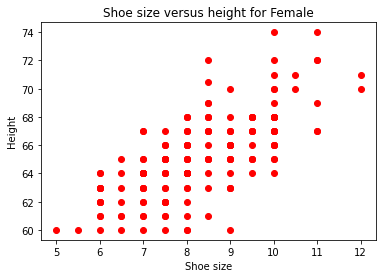

For female Pearson"s correlation coefficient is 0.7078119417143971


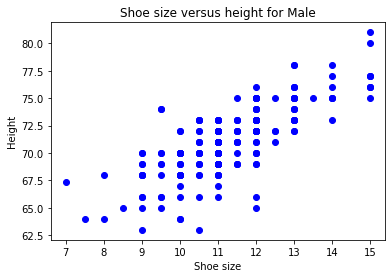

For male Pearson"s correlation coefficient is 0.7677093547300977


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#Load the CSV file shoesize.csv
df = pd.read_csv('./shoesize.csv')
df.columns = ['Index','Gender','Size','Height']

df_female = df.loc[df['Gender'] == 'F']
df_male   = df.loc[df['Gender'] == 'M']

#Plot the scatterplots of shoe size versus height for female 
plt.scatter(df_female['Size'], df_female['Height'],color='red')
plt.title("Shoe size versus height for Female")
plt.xlabel("Shoe size")
plt.ylabel("Height")
plt.show()

#Compute the Pearson's correlation coefficient of shoe size versus height for female 
cor_coef_female,p_value_female = stats.pearsonr(df_female['Size'], df_female['Height'])
print('For female Pearson"s correlation coefficient is {}'.format(cor_coef_female))

#Plot the scatterplots of shoe size versus height for male
plt.scatter(df_male['Size'], df_male['Height'],color='blue')
plt.title("Shoe size versus height for Male")
plt.xlabel("Shoe size")
plt.ylabel("Height")
plt.show()

#Compute the Pearson's correlation coefficient of shoe size versus height for male
cor_coef_male,p_value_male = stats.pearsonr(df_male['Size'], df_male['Height'])
print('For male Pearson"s correlation coefficient is {}'.format(cor_coef_male))

### Computing the correlation coeeficient

In [2]:
import numpy as np
import pandas as pd

age = np.array([23,23,27,27,39,41,47,49,52,54,54,56,57,58,58,60])
ageSeries = pd.Series(age)
bmi = np.array([16,19,18,21,24,23,26,25,24,26,23,26,27,31,26,27])
bmiSeries = pd.Series(bmi)

n = len(age)  #number of tuples

age_mean = ageSeries.mean()  # mean value of age
bmi_mean = bmiSeries.mean()  # mean value of bmi

print('Age mean: {}'.format(age_mean))
print('BMI mean: {}'.format(bmi_mean))

age_std = ageSeries.std()    # Standard deviation of age
bmi_std = bmiSeries.std()    # Standard deviation of bmi

print('Standard deviation of age: {}'.format(age_std))
print('Standard deviation of BMI: {}'.format(bmi_std))

denominator = n * age_std * bmi_std
print(denominator)
numerator = 0
for i in range(0,n):
    numerator += ((age[i]-age_mean) * (bmi[i]-bmi_mean))

print(numerator)

correlation_coefficient = numerator/denominator
print('The correlation coefficient is: {}'.format(correlation_coefficient))

if(correlation_coefficient > 0):
    print('Age and BMI are positvely correlated')
elif(correlation_coefficient == 0):
    print('Age and BMI are independent')
elif(correlation_coefficient < 0):
    print('Age and BMI are negatively correlated')

Age mean: 45.3125
BMI mean: 23.875
Standard deviation of age: 13.479459682544153
Standard deviation of BMI: 3.8275318418009276
825.4889783233531
689.625
The correlation coefficient is: 0.8354139402329686
Age and BMI are positvely correlated


### Computing chi-square

In [4]:
ohospitalA       = np.array([71,37])
ohospitalB       = np.array([129,73])
osatisfied       = np.array([71,129])
odissatisfied    = np.array([37,73])
data             = np.array([71,129,37,73])

totalOfdata         = np.sum(data)
totalOfhospitalA    = np.sum(ohospitalA)
totalOfhospitalB    = np.sum(ohospitalB)
totalOfsatisfied    = np.sum(osatisfied)
totalOfdissatisfied = np.sum(odissatisfied)


efhospitalASatisfied      = (totalOfhospitalA*totalOfsatisfied)/totalOfdata
efhospitalADissatisfied   = (totalOfhospitalA*totalOfdissatisfied)/totalOfdata
efhospitalBSatisfied      = (totalOfhospitalB*totalOfsatisfied)/totalOfdata
efhospitalBDissatisfied   = (totalOfhospitalB*totalOfdissatisfied)/totalOfdata

chi_square_test = (((ohospitalA[0]-efhospitalASatisfied)**2)/efhospitalASatisfied)       + \
                  (((ohospitalB[0]-efhospitalBSatisfied)**2)/efhospitalBSatisfied)       + \
                  (((ohospitalA[1]-efhospitalADissatisfied)**2)/efhospitalADissatisfied) + \
                  (((ohospitalB[1]-efhospitalBDissatisfied)**2)/efhospitalBDissatisfied)

print('Chi sqaure statistic is: {}'.format(chi_square_test))


Chi sqaure statistic is: 0.10857544087742113
